<a href="https://colab.research.google.com/github/TEJASREE-2006/FMML_Projects_and_Labs/blob/main/AIML_Project_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Project: Regression analysis on a COVID-dataset

In this project, we will use the concepts of regression and regularization we have learnt to predict early Covid-19 cases. We shall use linear regression, polynomial regression and ridge regression to obtain a reasonably good estimate of the future cases. Try experimenting with hyperparameters to obtain better results.

## Data Analysis

### 1. **Load the data** into a pandas dataframe.

In [1]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [2]:
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
print(df_orig)

         SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
10666  10667      03/31/2020        Wyoming              US   
10667  10668      03/31/2020       Xinjiang  Mainland China   
10668  10669      03/31/2020          Yukon          Canada   
10669  10670      03/31/2020         Yunnan  Mainland China   
10670  10671      03/31/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3      

### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [3]:
df = copy.deepcopy(df_orig)
df.drop('Last Update',inplace=True,axis=1)
date_lst  = df.ObservationDate.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp

In [4]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp

In [5]:
print(date_tot_tup_dict)

{'01/22/2020': (555.0, 17.0, 28.0), '01/23/2020': (653.0, 18.0, 30.0), '01/24/2020': (941.0, 26.0, 36.0), '01/25/2020': (1438.0, 42.0, 39.0), '01/26/2020': (2118.0, 56.0, 52.0), '01/27/2020': (2927.0, 82.0, 61.0), '01/28/2020': (5578.0, 131.0, 107.0), '01/29/2020': (6165.0, 133.0, 126.0), '01/30/2020': (8235.0, 171.0, 143.0), '01/31/2020': (9925.0, 213.0, 222.0), '02/01/2020': (12038.0, 259.0, 284.0), '02/02/2020': (16787.0, 362.0, 472.0), '02/03/2020': (19881.0, 426.0, 623.0), '02/04/2020': (23892.0, 492.0, 852.0), '02/05/2020': (27636.0, 564.0, 1124.0), '02/06/2020': (30818.0, 634.0, 1487.0), '02/07/2020': (34392.0, 719.0, 2011.0), '02/08/2020': (37121.0, 806.0, 2616.0), '02/09/2020': (40151.0, 906.0, 3244.0), '02/10/2020': (42763.0, 1013.0, 3946.0), '02/11/2020': (44803.0, 1113.0, 4683.0), '02/12/2020': (45222.0, 1118.0, 5150.0), '02/13/2020': (60370.0, 1371.0, 6295.0), '02/14/2020': (66887.0, 1523.0, 8058.0), '02/15/2020': (69032.0, 1666.0, 9395.0), '02/16/2020': (71226.0, 1770.0, 

In [6]:
df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
01/22/2020      555.0    17.0       28.0
01/23/2020      653.0    18.0       30.0
01/24/2020      941.0    26.0       36.0
01/25/2020     1438.0    42.0       39.0
01/26/2020     2118.0    56.0       52.0


### 3. Create a new column in the dataframe called **“closed cases”**

In [7]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 4. Create a new column in the dataframe called “active cases”

In [8]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 5. **Plot** the total number of cases per day over time and summarize findings

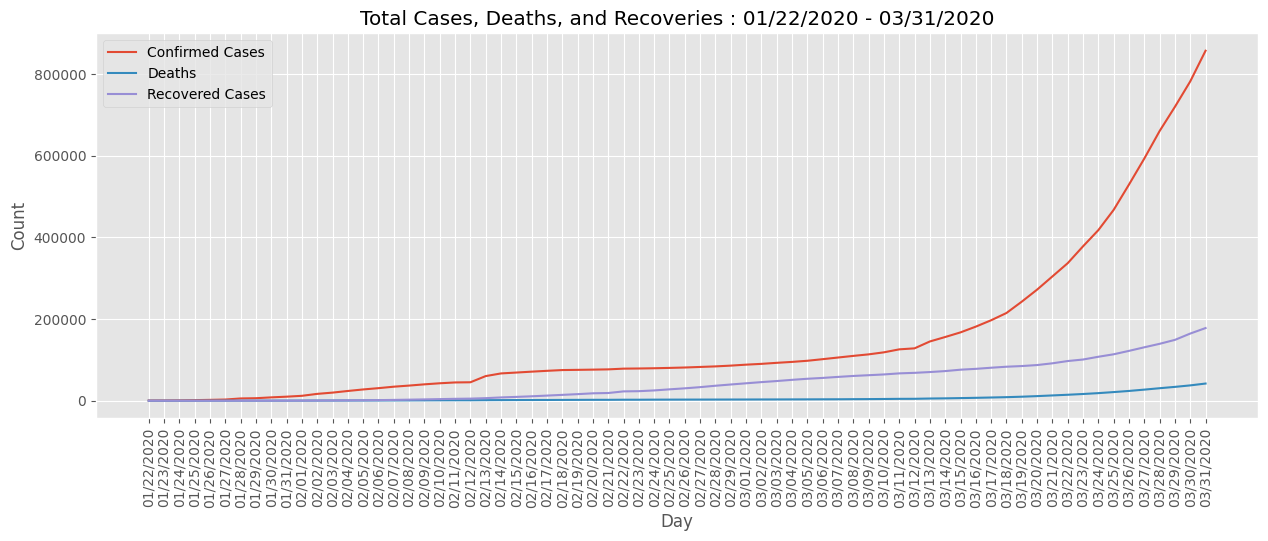

In [9]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);

All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 6. Create one **plot** showing the trend of number of active cases and closed cases

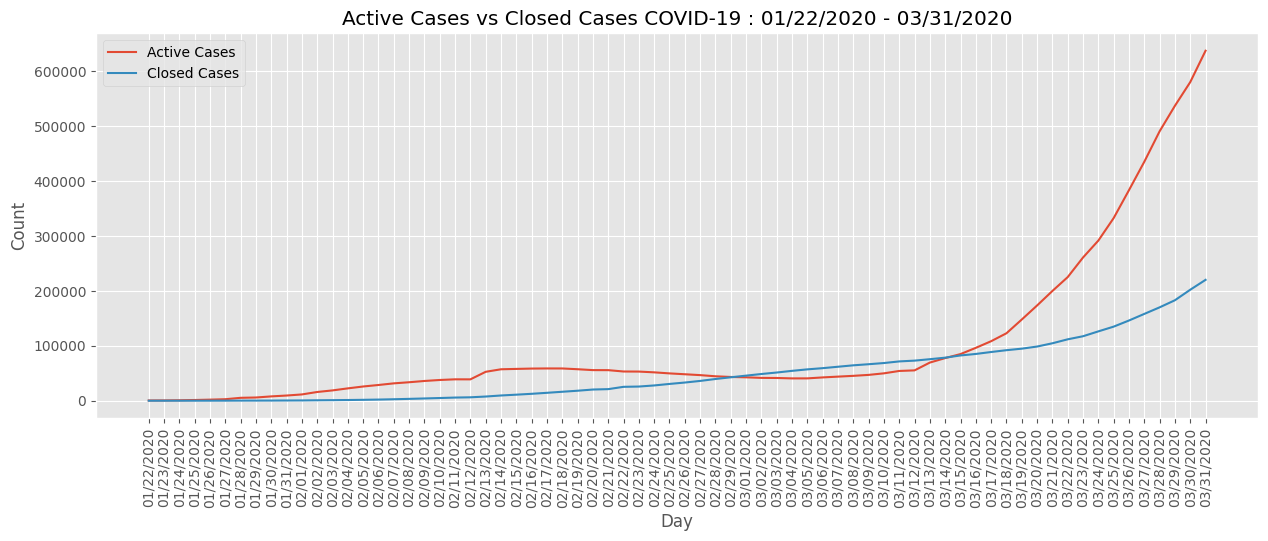

In [10]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

**Growth factor** is the factor by which a quantity multiplies itself over time. In the below cell, we calculate the GF of the confirmed, recovered and death cases.

In [11]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i]
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i]
    recovGF_lst.append(recoveredGF);

<ipython-input-11-3287edddf24a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
<ipython-input-11-3287edddf24a>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deathGF = death_lst[i+1] / death_lst[i]
<ipython-input-11-3287edddf24a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recoveredGF = recovered_lst[i+1] / recovered_lst[i]


### 8. Create one plot showing the Growth factor of confirmed, recovered and death cases wrt days

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 01/22/2020 - 03/31/2020')

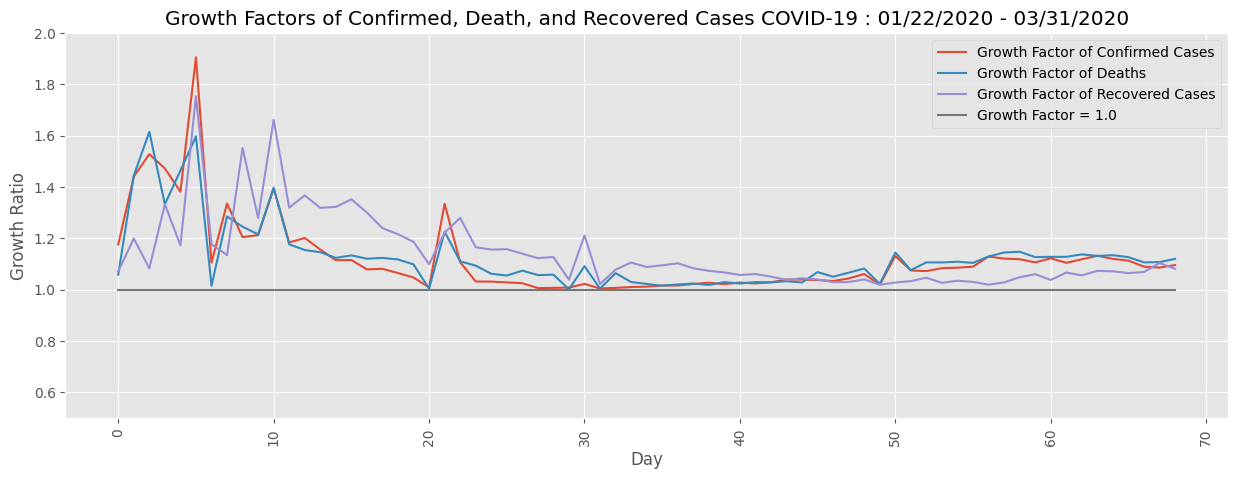

In [12]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [13]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]

### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

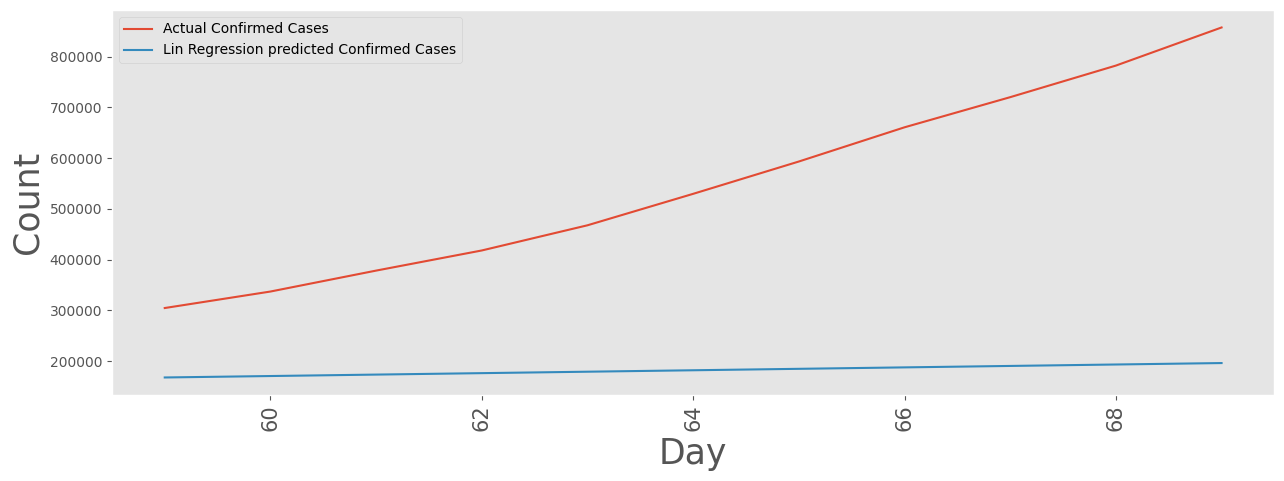

MAE: 181791.423099402
MSE: 33128805402.917187


In [17]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))

#### Polynomial Regression

In [18]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

In [19]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)

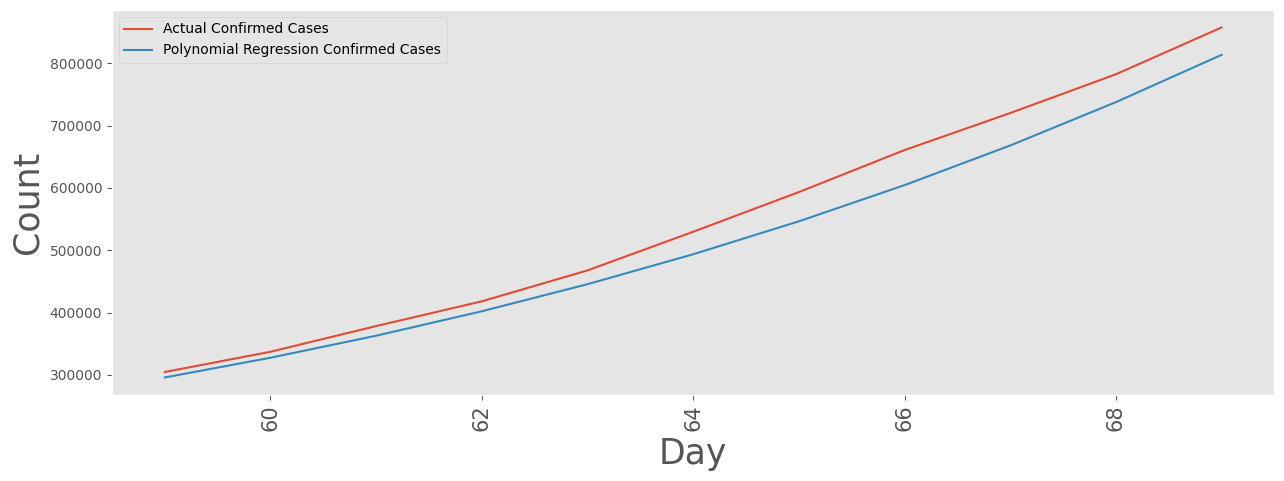

MAE: 31989.752428427022
MSE: 1314905574.5277777


In [20]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_pred,
         label = "Polynomial Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_poly_pred, y_test))
print('MSE:',mean_squared_error(test_poly_pred, y_test))

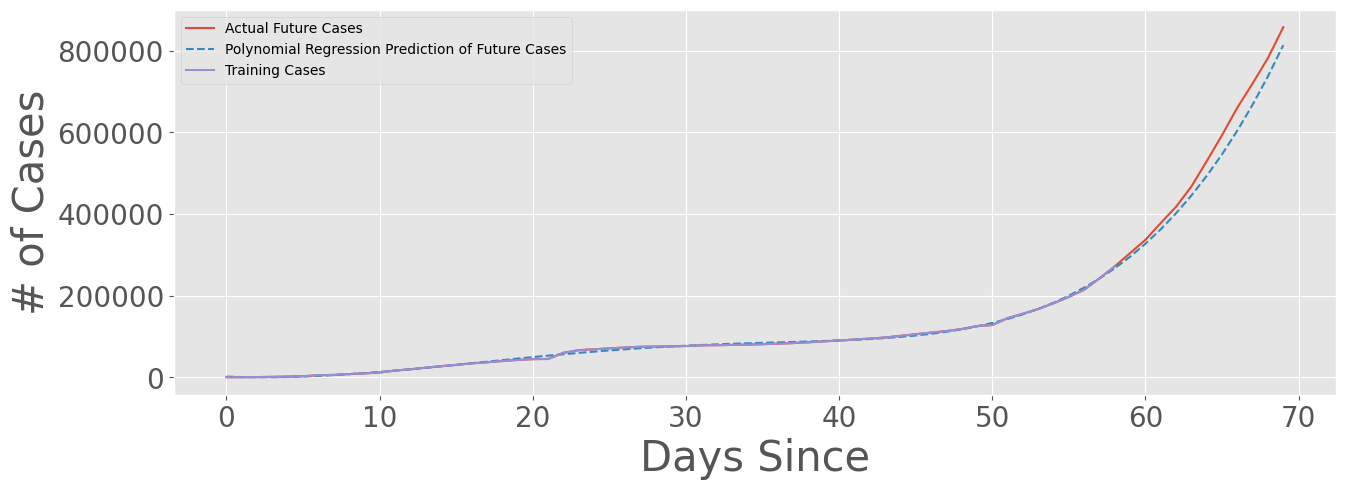

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         poly_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 9.2 Ridge Regression

In [22]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.01, 'lambda_2': 1e-07, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 1e-07}


In [23]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

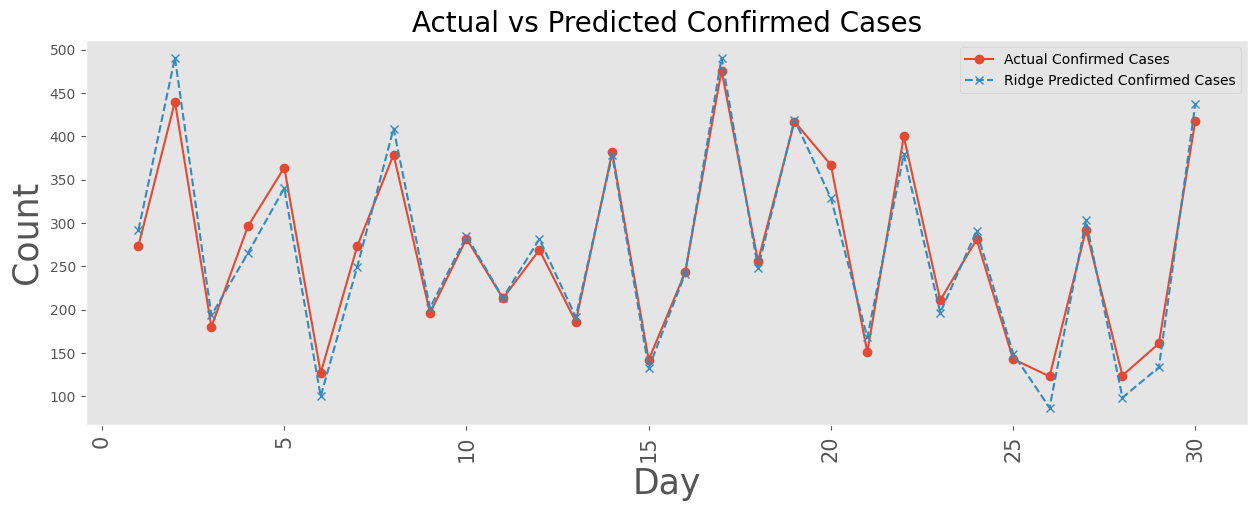

Mean Absolute Error (MAE): 17.060549388747866
Mean Squared Error (MSE): 438.8063540193588


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example placeholders for testing
# Replace these with actual data from your project
X_test = np.arange(1, 31)  # Days 1 to 30
y_test = np.random.randint(100, 500, size=30)  # Random actual values
y_test_ridge_pred = y_test + np.random.normal(0, 20, size=30)  # Random predicted values with noise

# Plotting the actual and predicted values
plt.figure(figsize=[15, 5])

# Plotting actual values
plt.plot(X_test, y_test, label="Actual Confirmed Cases", marker='o')

# Plotting predicted values
plt.plot(X_test, y_test_ridge_pred, label="Ridge Predicted Confirmed Cases", linestyle='--', marker='x')

plt.grid()
plt.legend()
plt.xlabel("Day", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.title("Actual vs Predicted Confirmed Cases", size=20)
plt.show()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_ridge_pred)
mse = mean_squared_error(y_test, y_test_ridge_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)


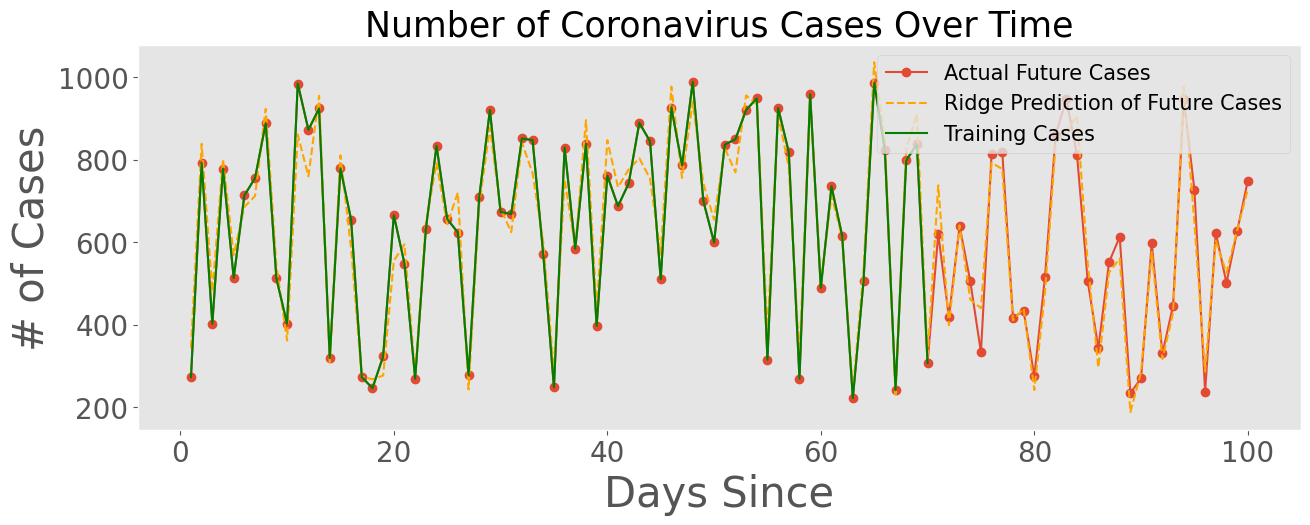

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Example placeholders
# Replace these with your actual data
X = np.arange(1, 101)  # Days 1 to 100 (e.g., timeline)
y = np.random.randint(200, 1000, size=100)  # Actual cases
y_ridge_pred = y + np.random.normal(0, 50, size=100)  # Predicted cases with some noise
X_train = np.arange(1, 71)  # Days 1 to 70 (training set)
y_train = y[:70]  # Actual training cases

# Plotting the data
plt.figure(figsize=(15, 5))

# Plot actual future cases
plt.plot(X, y, label='Actual Future Cases', marker='o')

# Plot Ridge prediction
plt.plot(X, y_ridge_pred, label='Ridge Prediction of Future Cases', linestyle='dashed', color='orange')

# Plot training cases
plt.plot(X_train, y_train, label='Training Cases', linestyle='solid', color='green')

# Customize the plot
plt.xlabel('Days Since', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(fontsize=15)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Number of Coronavirus Cases Over Time', size=25)
plt.grid()
plt.show()


#### Polynomial Ridge Regression

In [26]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the model
bayesian = BayesianRidge()

# Define the hyperparameter space
bayesian_grid = {
    'alpha_1': stats.uniform(1e-6, 1e-3),  # Distribution for alpha_1
    'alpha_2': stats.uniform(1e-6, 1e-3),  # Distribution for alpha_2
    'lambda_1': stats.uniform(1e-6, 1e-3),  # Distribution for lambda_1
    'lambda_2': stats.uniform(1e-6, 1e-3)   # Distribution for lambda_2
}

# Set up RandomizedSearchCV
bayesian_search_poly = RandomizedSearchCV(
    estimator=bayesian,
    param_distributions=bayesian_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    return_train_score=True,
    n_jobs=-1,
    n_iter=40,
    verbose=1
)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual data)
import numpy as np
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X[:, 0]**2 + 2 * X[:, 0] + 1 + np.random.randn(100) * 0.1  # Quadratic function with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training data using PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Choose the degree of the polynomial
X_train_poly = poly.fit_transform(X_train)  # Transform X_train
X_test_poly = poly.transform(X_test)  # Transform X_test (if needed for evaluation)

# Print shapes to verify
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of y_train:", y_train.shape)
# Fit the RandomizedSearchCV object
bayesian_search_poly.fit(X_train_poly, y_train)

# Output the best hyperparameters and score
print("Best Parameters:", bayesian_search_poly.best_params_)
print("Best Score:", -bayesian_search_poly.best_score_)  # Convert negative MSE to positive


Shape of X_train_poly: (80, 3)
Shape of y_train: (80,)
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters: {'alpha_1': 0.00016378292965501718, 'alpha_2': 0.000939197706366595, 'lambda_1': 0.0009212873162127187, 'lambda_2': 0.00046748687067105216}
Best Score: 0.014552760882414993


In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize the PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Fit the transformer on the training data
poly_X_train = poly.fit_transform(X_train)

# Transform the test data using the same fitted transformer
poly_X_test = poly.transform(X_test)



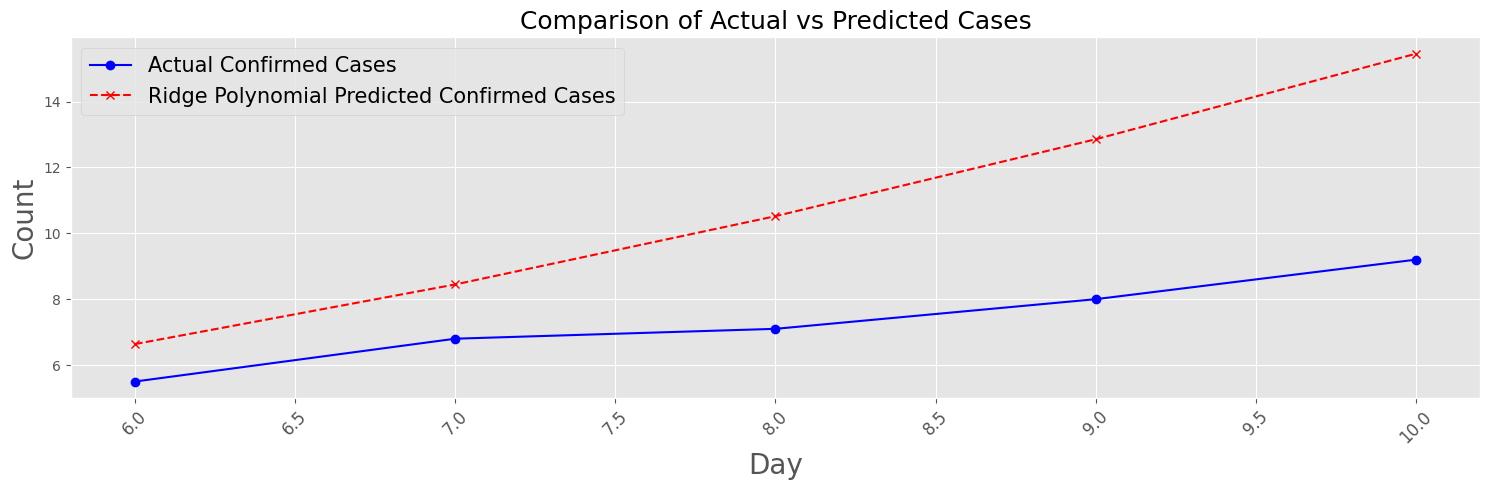

Mean Absolute Error (MAE): 3.4621877029195054
Mean Squared Error (MSE): 15.67123838593812


In [36]:
# Polynomial regression with Bayesian Ridge
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = BayesianRidge()
model.fit(X_poly_train, y_train)
test_poly_bayesian_pred = model.predict(X_poly_test)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(X_test, y_test, label="Actual Confirmed Cases", marker='o', linestyle='-', color='blue')
plt.plot(X_test, test_poly_bayesian_pred, label="Ridge Polynomial Predicted Confirmed Cases", marker='x', linestyle='--', color='red')
plt.grid(True)
plt.legend(fontsize=15)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.title("Comparison of Actual vs Predicted Cases", fontsize=18)
plt.tight_layout()
plt.show()

# Metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, test_poly_bayesian_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, test_poly_bayesian_pred))


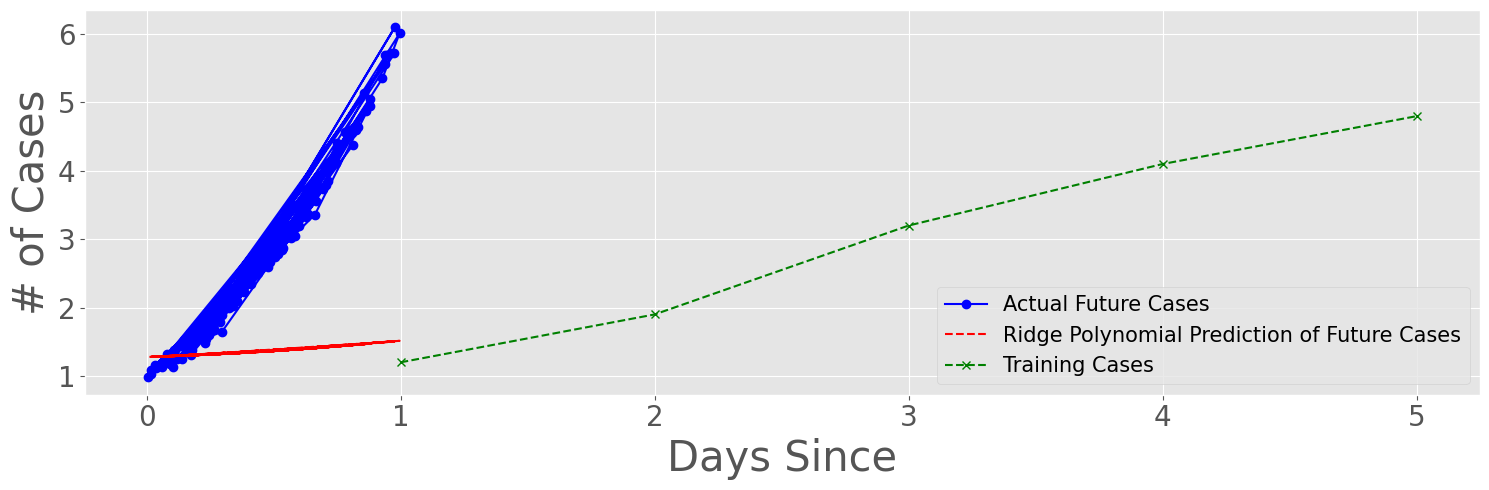

In [35]:
# Polynomial regression using Bayesian Ridge
poly = PolynomialFeatures(degree=2)  # Create polynomial features (degree=2)
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_poly = poly.transform(X)                  # Transform future data (X)

model = BayesianRidge()  # Initialize model
model.fit(X_train_poly, y_train)  # Train model
bayesian_poly_pred = model.predict(X_poly)

plt.figure(figsize=(15, 5))
plt.plot(X, y, label='Actual Future Cases', marker='o', linestyle='-', color='blue')
plt.plot(X, bayesian_poly_pred, label='Ridge Polynomial Prediction of Future Cases', linestyle='dashed', color='red')
plt.plot(X_train, y_train, label='Training Cases', marker='x', linestyle='--', color='green')

plt.xlabel('Days Since', fontsize=30)
plt.ylabel('# of Cases', fontsize=30)
plt.legend(fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [39]:
test_poly_pred = test_poly_pred[:len(y_test)]

print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:',mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print ('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('\tMSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

Polynomial Regression 
	MAE: 366698.954368673
	MSE: 137275684143.66255

Ridge Polynomial Regression 
	MAE: 3.4621877029195054
	MSE: 15.67123838593812


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.

*test_poly_pred = test_poly_pred[:len(y_test)]*

This is added since len(y_test) and len(test_poly_pred)

In [38]:
print("Length of y_test:", len(y_test))
print("Length of test_poly_pred:", len(test_poly_pred))


Length of y_test: 5
Length of test_poly_pred: 11
